<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/StreetPlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download shp

In [ ]:
!pip install osmnx
!pip install geopandas
!pip install scikit-learn

In [2]:
!sh download_all_cities.sh  # add bash in windows

nohup: appending output to 'nohup.out'


# Create points along streets

In [7]:
!sh create_pts_all_cities.sh

nohup: appending output to 'nohup.out'


# Download panoids

In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [9]:
pt = pd.read_pickle('Boston/ptBoston.p')
pt.tail(1)

,id,lon,lat
36369,36375,-71.09788,42.31532


In [10]:
pt.shape

(36370, 3)

<Axes: >

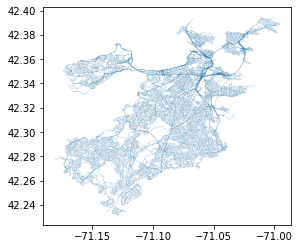

In [11]:
pts = gpd.GeoDataFrame(pt, geometry=gpd.points_from_xy(x=pt.lon, y=pt.lat))
pts.plot(markersize=0.001)

In [13]:
# About 3 hours
!sh download_panoid.sh

nohup: appending output to 'nohup.out'


In [46]:
panoids = pd.read_pickle('/content/BostonGSV/pano_2023-03-28 12:49:41.194094_36370.p')
panoids

,panoid,lat,lon,year,month,id
0,xf1sAuN8FYR7yhYwYnc-0Q,42.367252,-71.022083,2011.0,11.0,0
1,bNOzLqqlUyEznjgxpl7ABg,42.367613,-71.021850,2015.0,10.0,0
2,Wbrsux9MD7V-r_FoA7VjZQ,42.366686,-71.023665,2011.0,11.0,1
3,zO-Itw4oHu4Vo0rp9fMCvQ,42.366712,-71.024178,2015.0,10.0,1
4,YuH2kVxMhm9cih_GYa_4wA,42.366423,-71.024203,2011.0,11.0,2
...,...,...,...,...,...,...
89299,t4EzwtgttC_k1-qbpAENVw,42.378729,-71.058671,2013.0,9.0,10000
89300,P0JoTbflnwoMWhjbnlxnQA,42.378720,-71.058624,2018.0,8.0,10000
89301,D6MnoJxREjb0vyg8IqDKtA,42.378709,-71.058632,2019.0,8.0,10000
89302,ZzsDfV-HD7Z_4Ya-czdkKw,42.378849,-71.058992,2020.0,11.0,10000


In [47]:
panoids.tail()

,panoid,lat,lon,year,month,id
89299,t4EzwtgttC_k1-qbpAENVw,42.378729,-71.058671,2013.0,9.0,10000
89300,P0JoTbflnwoMWhjbnlxnQA,42.378720,-71.058624,2018.0,8.0,10000
89301,D6MnoJxREjb0vyg8IqDKtA,42.378709,-71.058632,2019.0,8.0,10000
89302,ZzsDfV-HD7Z_4Ya-czdkKw,42.378849,-71.058992,2020.0,11.0,10000
89303,okyplJvXgF_0ZdOKWC0QWQ,42.378733,-71.058664,2021.0,10.0,10000


In [48]:
panoids.shape

(89304, 6)

# Process panoids

In [49]:
!sh process_panoid.sh

nohup: appending output to 'nohup.out'


In [51]:
panoids = pd.read_pickle('BostonGSV/panoids.p')
panoids

,id,panoid,lat,lon,year,month,marker
0,0,bNOzLqqlUyEznjgxpl7ABg,42.367613,-71.021850,2015.0,10.0,True
1,1,zO-Itw4oHu4Vo0rp9fMCvQ,42.366712,-71.024178,2015.0,10.0,True
2,2,RJjOCLFVtSK4vRQRr5FqjQ,42.366709,-71.023788,2015.0,10.0,True
3,3,ZuPlM9UP756qZ02xvPeC4Q,42.366598,-71.023270,2015.0,10.0,True
4,4,8YGIqYLpB4N1fFDIVrO30w,42.366632,-71.022714,2011.0,11.0,True
...,...,...,...,...,...,...,...
4955,4955,NwcZsADCn8vLg6Mw7eEkHA,42.341584,-71.048200,2022.0,9.0,False
4956,4956,El8P9QMg73Ml3Dek43H-mw,42.344818,-71.043748,2022.0,8.0,False
4957,4957,1zQ8XJTSAnavjYx1znas-Q,42.344525,-71.044207,2022.0,8.0,False
4958,4958,oRhTXFAE8kCosgqUZ-zGfA,42.344145,-71.044536,2022.0,8.0,False


# Download GSV images

In [29]:
# About 5 hours
!sh download_gsv.sh

nohup: appending output to 'nohup.out'


In [52]:
panoids = pd.read_pickle('BostonGSV/panoids.p')
panoids[panoids.marker==True].tail()

,id,panoid,lat,lon,year,month,marker
2496,2496,7qSOScheu6Skw-df2wBUsg,42.357448,-71.150321,2020.0,10.0,True
2497,2497,DiBBuZnovGua9G9lnm_R_Q,42.357327,-71.149877,2022.0,8.0,True
2498,2498,RaRYTHsBDVE0ySK4V7qGuQ,42.357218,-71.149408,2022.0,8.0,True
2499,2499,5oB9PDLBObEagkfJl_yU2g,42.357095,-71.148923,2022.0,8.0,True
2500,2500,1cT_qoMa44MRWDXEHCNORg,42.358053,-71.158059,2022.0,8.0,True


In [34]:
panoids.shape

(4960, 7)

# Directory travel of GSV images

In [38]:
!sh run_dir_travel.sh

nohup: appending output to 'nohup.out'
nohup: appending output to 'nohup.out'


In [50]:
mturk = pd.read_pickle('/content/AmazonTurk/2023-03-28 13:11:34.791570_fileInfo.p')
mturk

,folder,name,type


In [ ]:
# split training and testing sets
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

labels = pd.read_csv('AmazonTurk/Boston_Labels3000.csv')
labels["suffix"] = labels.apply(lambda x: x["Input.image_url"].split('.')[-1], axis=1)
labels = labels[labels["suffix"]=="jpg"]

def map_score(x):
    if x == "Very Unplayable":
        return 0
    elif x == "Unplayable":
        return 1
    elif x == "Neither Playable nor Unplayable":
        return 2
    elif x == "Playable":
        return 3
    elif x == "Very Playable":
        return 4
    
def map_class(x):
    if x <= 0.8:
        return 0
    elif x <= 1.6:
        return 1
    elif x <= 2.3:
        return 2
    elif x <= 3.0:
        return 3
    else:
        return 4
    
labels["score"] = labels["Answer.category.label"].apply(lambda x: map_score(x))
labels = labels.groupby("Input.image_url").mean().iloc[1:, ]
labels["label"] = labels["score"].apply(lambda x: map_class(x))
labels = labels.reset_index()
labels["path"] = labels["Input.image_url"].apply(lambda x: f"./AmazonTurk/MTurk_Images/{x}")
train, test = train_test_split(labels, test_size=0.2)
train["split"] = 'train'
test["split"] = 'val'
labels = pd.concat([train, test])
labels.to_pickle('AmazonTurk/MTurk_GSV.p')
labels.head(1)

KeyError: ignored

# ResNet image classification train

In [ ]:
!sh run_model.sh

nohup: appending output to 'nohup.out'


In [ ]:
import seaborn as sns

model_acc = pd.read_pickle('models/2020-08-13_log.p')
model_acc = model_acc[model_acc["type"]=="val"]
sns.lineplot(data=model_acc, x=model_acc.epoch, y=model_acc.top1)
model_acc.tail()

FileNotFoundError: ignored

# ResNet image classification on GSV

In [ ]:
gsv = pd.read_pickle('BostonGSV/2020-08-13 00:37:00.961637_fileInfo.p')
gsv["path"] = gsv.apply(lambda x: f"{x['folder']}/{x['name']}", axis=1)
gsv["split"] = "val"
gsv["label"] = "0"
gsv.to_pickle('BostonGSV/GSV_all.p')
gsv.head()

In [ ]:
!sh evaluate_model.sh

In [ ]:
pd.read_pickle('BostonGSV/GSV_all.p').head(1)

In [ ]:
pd.read_pickle('BostonGSV/2020-08-13_evaluate.p').tail(1)

# Emotion classification

In [ ]:
!sh run_perception.sh

In [ ]:
pd.read_pickle('BostonGSV/2020-08-13_all_evaluate.p').tail(1)